# This homework was done by Semenchenko Taras

# 1. Introduction. Task description. The ultimate goal.

Task: Regression: predict taxi fare price
Tool: From Python code
Using an Azure ML SDK for Python you need to do:

- register a model;
- deploy a model as web API;
- consume a model;
- add a few test calls to web API and explain results.

Adding a model interpretability / fairness description will be a big plus.


# 2. Dataset description

The dataset was taken from https://github.com/dotnet/machinelearning/tree/master/test/data.
That dataset contains 1048575 rows.

The columns in the dataset:

- vendor_id - A code indicating the TPEP provider that provided the record. 
    - CMT - Creative Mobile Technologies, LLC; 
    - VTS - VeriFone Inc
- rate_code - The final rate code in effect at the end of the trip.
    - 1 - Standard rate
    - 2 - JFK
    - 3 - Newark
    - 4 - Nassau or Westchester
    - 5 - Negotiated fare
    - 6 - Group ride
    - 0 - Unknown
- passenger_count - The number of passengers in the vehicle. This is a driver-entered value.
- trip_time_in_secs - Travel time in seconds
- trip_distance - The elapsed trip distance in miles reported by the taximeter
- payment_type - A numeric code signifying how the passenger paid for the trip
    - CRD - Credit card
    - CSH - Cash
    - NOC - No charge
    - DIS - Dispute
    - UNK - Unknown
- fare_amount - The time-and-distance fare calculated by the meter.



# 3. Description of the tool I will use for training.

The main tool that I will use for training the model is sklearn library, that contains many different models and functions that helps prepare the data.
Also I will use numpy and pandas for data manipulation and seaborn for visualizing the data.



First I need to install the library seaborn in order to plot different graphs.

In [1]:
# !pip install seaborn

Here I import libraries numpy, pandas, matplotlib, seaborn for data manipulation and visualization.
As well as a sklearn library for data preprocessing and for creating a model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

random_seed = 42

# Data Exploration
Loading the data and displaying the first lines of the dataset along with some statistics.

In [3]:
train_df = pd.read_csv('taxi-fare-train.csv')
test_df = pd.read_csv('taxi-fare-test.csv')
train_df.head()

,vendor_id,rate_code,passenger_count,trip_time_in_secs,trip_distance,payment_type,fare_amount
0,CMT,1,1,1271,3.8,CRD,17.5
1,CMT,1,1,474,1.5,CRD,8.0
2,CMT,1,1,637,1.4,CRD,8.5
3,CMT,1,1,181,0.6,CSH,4.5
4,CMT,1,1,661,1.1,CRD,8.5


Types of the columns and number of non-null values (you can see that there are no null values in the dataset)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
vendor_id            1048575 non-null object
rate_code            1048575 non-null int64
passenger_count      1048575 non-null int64
trip_time_in_secs    1048575 non-null int64
trip_distance        1048575 non-null float64
payment_type         1048575 non-null object
fare_amount          1048575 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 56.0+ MB


The next cell shows attribute statictics

In [5]:
train_df.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,fare_amount
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.033057e+00,1.751133e+00,6.834792e+02,2.777991e+00,1.166208e+01
std,2.755313e-01,1.408420e+00,4.927410e+02,3.301277e+00,9.594169e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00
25%,1.000000e+00,1.000000e+00,3.600000e+02,1.000000e+00,6.500000e+00
50%,1.000000e+00,1.000000e+00,5.550000e+02,1.700000e+00,9.000000e+00
75%,1.000000e+00,2.000000e+00,8.870000e+02,3.090000e+00,1.300000e+01
max,6.000000e+00,6.000000e+00,1.062000e+04,9.870000e+01,4.250000e+02


Correlation matrix
(Note: features `trip_time_in_secs` and `trip_distance` are correlated)

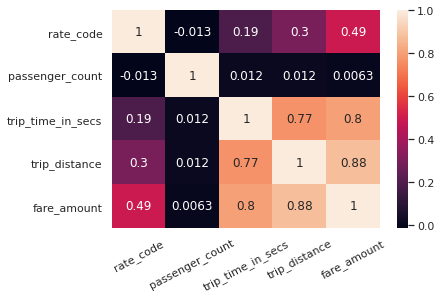

In [6]:
corr = train_df.corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True);
plt.xticks(rotation=28);

Plots below show mean `fare_amount` per `rate_code` and distribution of `rate_code` feature.
(Note: 99% of instances in feature `rate_code` have value `1`)

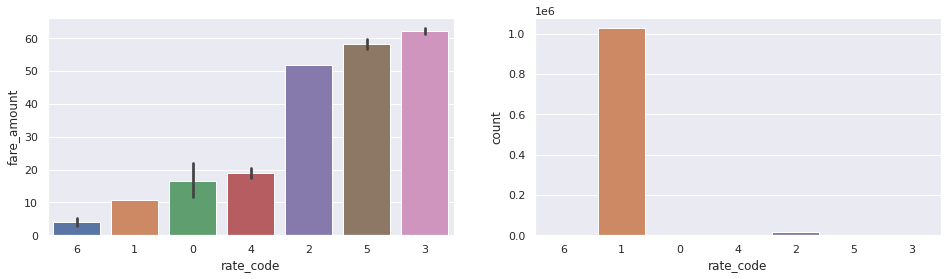

In [7]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 4))

rate_code_order = train_df.groupby(by='rate_code').mean()['fare_amount'].sort_values().index
sns.barplot(x="rate_code", y="fare_amount", data=train_df, order=rate_code_order, ax=axs[0]);
ax = sns.countplot(x="rate_code", data=train_df, order=rate_code_order, ax=axs[1])

Dependence between features `trip_time_in_secs`, `trip_distance` and label `fare_amount`.


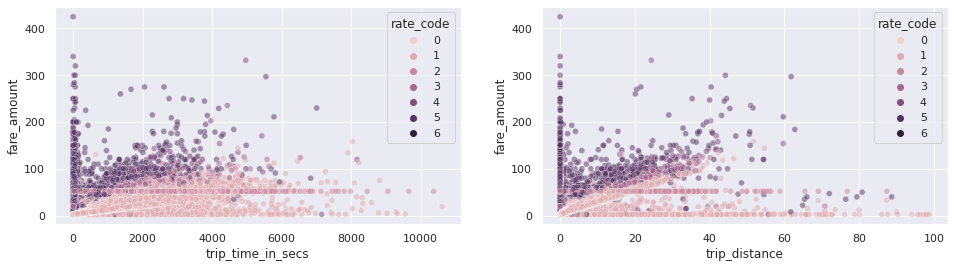

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 4))

sns.scatterplot(data=train_df, x='trip_time_in_secs', y='fare_amount', hue='rate_code', alpha=0.5, ax=axs[0]);
sns.scatterplot(data=train_df, x='trip_distance', y='fare_amount', hue='rate_code', alpha=0.5, ax=axs[1]);

Distribution of label `fare_amount` and that label in log space.

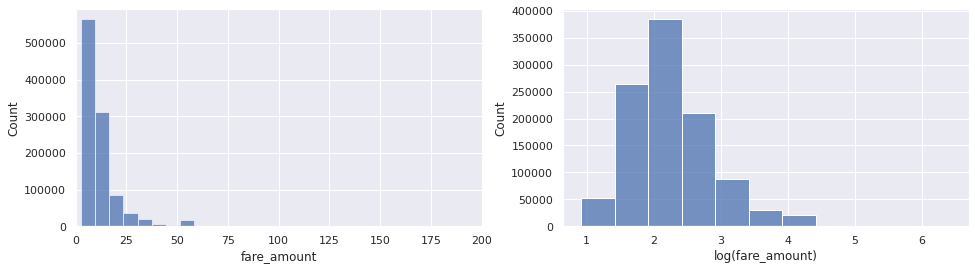

In [9]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
ax = sns.histplot(train_df['fare_amount'], binwidth=7, ax=axs[0]);
ax.set_xlim(0, 200);
ax = sns.histplot(np.log(train_df['fare_amount']), binwidth=0.5, ax=axs[1]);
ax.set(xlabel='log(fare_amount)');

# 4. Description of the model training process

The training of the model will be quite simple.

1. The data will be splitted on train and valid subsets.
2. Then I will encode categorical values.
4. After preparation I will train model (I decided to choose Random Forest) on the training set and tune hyper-parameters on the validation set
5. When the model is tuned, I will evaluate the result on test set (which I uploaded at the step 1) using the metric accuracy and f1 score.

Here I create DataFrame that contains only features and Series that contains corresponding labels. Then I splitted the data on train and valid subsets.

In [10]:
features = ['vendor_id', 'rate_code', 'passenger_count', 'trip_time_in_secs', 'trip_distance', 'payment_type']
label = 'fare_amount'

X = train_df[features].copy()
y = train_df[label].copy()

train_X, valid_X, train_y, valid_y = train_test_split(X, y, train_size=0.8)

test_X = test_df[features].copy()
test_y = test_df[label].copy()

Before training model on dataset I have to preprocess categorical data by using LabelEncoder.
(I decided not to use OneHotEncoder, because with Random Forest model, accuracy will be the same)

In [11]:
cat_cols = ['vendor_id', 'payment_type']

for col in cat_cols:

    encoder = LabelEncoder()

    train_X[col] = encoder.fit_transform(train_X[col])
    valid_X[col] = encoder.transform(valid_X[col])
    test_X[col] = encoder.transform(test_X[col])

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


And here I created and trained my model. I choosed Random Forest model because it can be easily tuned

In [12]:
model = RandomForestRegressor(max_depth=7, random_state=random_seed)
model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating the model using R squared and RMSE scores

In [13]:
print('Valid R2 score:  ', r2_score(model.predict(valid_X), valid_y))
print('Valid RMSE score:', mean_squared_error(model.predict(valid_X), valid_y))
print()
print('Test  R2 score:  ', r2_score(model.predict(test_X), test_y))
print('Test  RMSE score:', mean_squared_error(model.predict(test_X), test_y))

Valid R2 score:   0.9305484187880175
Valid RMSE score: 5.997799097807228

Test  R2 score:   0.90006570079716
Test  RMSE score: 8.608175507902748


# Model Interpretability

RandomForestRegressor can return feature importance and it is very useful in order to understand which attributes does the model depend on.

On the plot below we can see that there are only three useful features:
- trip_distance
- rate_code
- trip_time_in_secs

Another features are useless because vendor ID, payment type and number of passanger do not affect fare amount.

Features trip_distance and trip_time_in_secs are enough correlated (correletion is 0.77), 
however, the model shows that the target depends more on distance variable than on time.

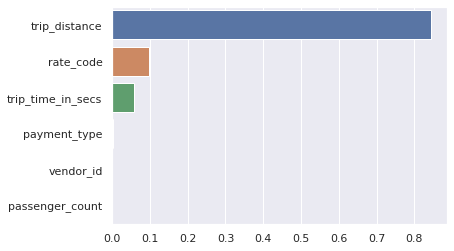

In [14]:
importances = model.feature_importances_
order = np.argsort(importances)[::-1]
importances.tolist()

sns.barplot(x=importances[order], y=X.columns[order]);

On the plot below we can again see dependence of `fare_amount` and features `trip_time_in_secs` and `trip_distance`, however, now we can also see the prediction of the model that was created.

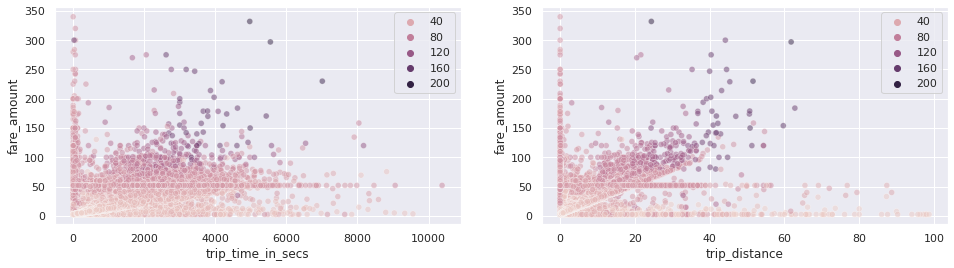

In [27]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
preds = model.predict(train_X)
sns.scatterplot(data=train_X, x='trip_time_in_secs', y=train_y, hue=preds, alpha=0.5, ax=axs[0]);
sns.scatterplot(data=train_X, x='trip_distance', y=train_y, hue=preds, alpha=0.5, ax=axs[1]);

Since 99% instances in the dataset has featrue rate_code equal to `1`, so the decision of the model depends only on 2 features:
`trip_distance` and `trip_time_in_secs`.

And I will plot this feature space in order to show how model makes decision.

The second plot shows dependence of target variable and model predictions.

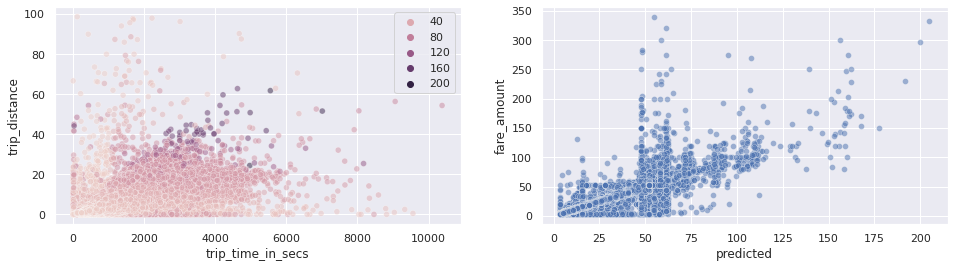

In [16]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
preds = model.predict(train_X)
sns.scatterplot(data=train_X, x='trip_time_in_secs', y='trip_distance', hue=preds, alpha=0.5, ax=axs[0]);
ax = sns.scatterplot(x=preds, y=train_y, alpha=0.5, ax=axs[1]);
ax.set(xlabel='predicted');

# 5. Registering the model and deploying it as a web API

In [17]:
import joblib
joblib.dump(model, 'model.joblib') # saving model as model.joblib

['model.joblib']

Registering the model:

In [18]:
from azureml.core import Workspace
from azureml.core import Model

ws = Workspace.from_config()

model_register = Model.register(workspace = ws,
                       model_path = "model.joblib",
                       model_name = "sklearn-taxi-fare3",
                       model_framework=Model.Framework.SCIKITLEARN,
                       model_framework_version='0.22.2',
                       description = "Nope")

Registering model sklearn-taxi-fare3


Deploying the model:

In [22]:
from azureml.core import Workspace
from azureml.core.model import Model

model_name = "sklearn-taxi-fare3"
endpoint_name = "sklearn-taxi-fare-ep3"

ws = Workspace.from_config()

# Locate the model in the workspace
model_azure = Model(ws, name=model_name)

# Deploy the model as a real-time endpoint
service = Model.deploy(ws, endpoint_name, [model_azure])

# Wait for the model deployment to complete
service.wait_for_deployment(show_output=True)

Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running............................
Succeeded
ACI service creation operation finished, operation "Succeeded"


Getting scoring URI:

In [23]:
print(service.scoring_uri)

http://d06e98e9-bfbd-484e-961c-8305eb8112da.westeurope.azurecontainer.io/score


# 6. Consuming the model and testing it

In [24]:
import json
import requests

input_array = test_X.iloc[0, :].tolist()
scoring_uri = "http://d06e98e9-bfbd-484e-961c-8305eb8112da.westeurope.azurecontainer.io/score"

# Add the 'data' field
data = { "data" : input_array, 
        "method" : "predict"} # Write it in the required format for the REST API

input_data = json.dumps(data) # Convert to JSON string

# Set the content type to JSON
headers = {"Content-Type": "application/json"}

# Make the request and display the response
resp = requests.post(scoring_uri, input_data, headers=headers)

# Return the model output
result = json.loads(resp.text)
print('Consumed model prediction:', result['predict'])

Consumed model prediction: 15.555765560749892


In [25]:
print('Sklearn model prediction:', model.predict(test_X.iloc[0, :][None, :])[0])

Sklearn model prediction: 15.555765560749892
